In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
DATA_FOLDER = '/Users/vsevolodanisuk/PycharmProjects/planet_amazon_model/dataset/planet/planet/'
!ls {DATA_FOLDER}

df_train_ohe.csv      test-jpg              train_classes.csv
sample_submission.csv train-jpg


In [41]:
df = pd.read_csv(os.path.join(DATA_FOLDER, 'train_classes.csv'))
print(df.head())
print('\n')
print(df.describe())
print('\n')
print(df.shape)

  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road


       image_name           tags
count       40479          40479
unique      40479            449
top       train_0  clear primary
freq            1          13636


(40479, 2)


In [42]:
total_tags = []
for i in range(df.shape[0]):
    for n in df['tags'][i].split(' '):
        if not n in total_tags:
            total_tags.append(n)
total_tags

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

In [43]:
new_df_dict = {
    'Id': []
}
for tag in total_tags:
    new_df_dict[tag] = []

for i in range(df.shape[0]):
    new_df_dict['Id'].append(df['image_name'][i])
    for n in total_tags:
        if n in df['tags'][i]:
            new_df_dict[n].append(1)
        else:
            new_df_dict[n].append(0)

new_df = df.from_dict(new_df_dict)
new_df.head()

,Id,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [44]:
new_df.shape

(40479, 18)

In [45]:
len(total_tags)

17

In [46]:
all_classes = []
for classes_list in df['tags']:
    all_classes.extend(classes_list.split(','))

In [47]:
dict_class_counts = {}

for tag in total_tags:
    result = len(new_df[new_df[tag] == 1])
    dict_class_counts[tag] = result
    
dict_class_counts

{'haze': 2697,
 'primary': 37513,
 'agriculture': 12315,
 'clear': 28431,
 'water': 7411,
 'habitation': 3660,
 'road': 8071,
 'cultivation': 4477,
 'slash_burn': 209,
 'cloudy': 9350,
 'partly_cloudy': 7261,
 'conventional_mine': 100,
 'bare_ground': 862,
 'artisinal_mine': 339,
 'blooming': 332,
 'selective_logging': 340,
 'blow_down': 98}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'agriculture'),
  Text(1, 0, 'artisinal_mine'),
  Text(2, 0, 'bare_ground'),
  Text(3, 0, 'blooming'),
  Text(4, 0, 'blow_down'),
  Text(5, 0, 'clear'),
  Text(6, 0, 'cloudy'),
  Text(7, 0, 'conventional_mine'),
  Text(8, 0, 'cultivation'),
  Text(9, 0, 'habitation'),
  Text(10, 0, 'haze'),
  Text(11, 0, 'partly_cloudy'),
  Text(12, 0, 'primary'),
  Text(13, 0, 'road'),
  Text(14, 0, 'selective_logging'),
  Text(15, 0, 'slash_burn'),
  Text(16, 0, 'water')])

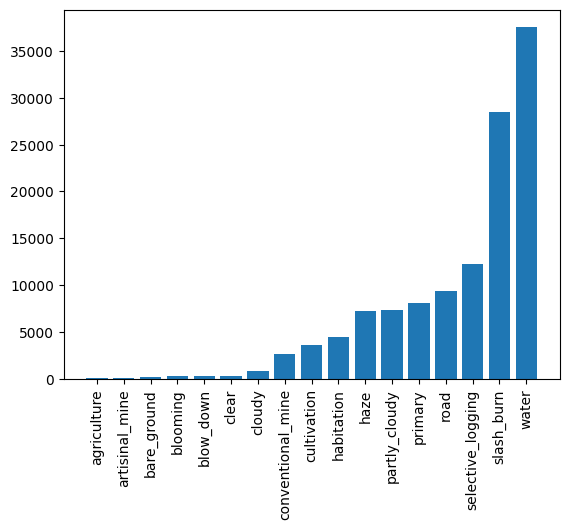

In [48]:
class_names = list(dict_class_counts.keys())
class_counts = list(dict_class_counts.values())

class_names.sort()
class_counts.sort()

plt.bar(class_names, class_counts)
plt.xticks(rotation=90)

In [54]:
middle_class_counts = 0
for i in class_counts:
    middle_class_counts += i
middle_class_counts = middle_class_counts // len(class_counts)
print(f'{middle_class_counts=}')


dict_class_counts2 = dict_class_counts
for class_name in dict_class_counts2:
    if dict_class_counts2[class_name] < middle_class_counts:
        while (dict_class_counts2[class_name] < middle_class_counts):
            rows_to_duplicate = new_df[new_df[class_name] == 1]
            new_df2 = pd.concat([new_df, rows_to_duplicate], ignore_index=True)
            dict_class_counts2[class_name] = dict_class_counts2[class_name] + dict_class_counts2[class_name]

middle_class_counts=13502


In [51]:
dict_class_counts2

{'haze': 10788,
 'primary': 37513,
 'agriculture': 12315,
 'clear': 28431,
 'water': 7411,
 'habitation': 7320,
 'road': 8071,
 'cultivation': 8954,
 'slash_burn': 13376,
 'cloudy': 9350,
 'partly_cloudy': 14522,
 'conventional_mine': 12800,
 'bare_ground': 13792,
 'artisinal_mine': 10848,
 'blooming': 10624,
 'selective_logging': 10880,
 'blow_down': 12544}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'agriculture'),
  Text(1, 0, 'artisinal_mine'),
  Text(2, 0, 'bare_ground'),
  Text(3, 0, 'blooming'),
  Text(4, 0, 'blow_down'),
  Text(5, 0, 'clear'),
  Text(6, 0, 'cloudy'),
  Text(7, 0, 'conventional_mine'),
  Text(8, 0, 'cultivation'),
  Text(9, 0, 'habitation'),
  Text(10, 0, 'haze'),
  Text(11, 0, 'partly_cloudy'),
  Text(12, 0, 'primary'),
  Text(13, 0, 'road'),
  Text(14, 0, 'selective_logging'),
  Text(15, 0, 'slash_burn'),
  Text(16, 0, 'water')])

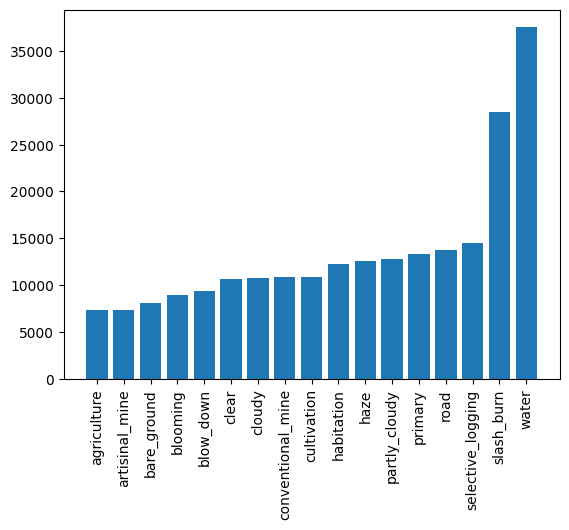

In [52]:
class_names = list(dict_class_counts.keys())
class_counts = list(dict_class_counts.values())

class_names.sort()
class_counts.sort()

plt.bar(class_names, class_counts)
plt.xticks(rotation=90)

In [24]:
new_df2.to_csv(
    os.path.join(DATA_FOLDER, 'df_train_ohe.csv'), 
    index=False)